In [12]:
from pathlib import Path
from typing import List, Dict, Optional

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
from matplotlib import pyplot as pl
from cycler import cycler
%matplotlib notebook

In [13]:
system = 'alligator'
existing = 'copying'

# Utilities

In [14]:
cyc = cycler(color=['k', 'r', 'k', 'r'], linestyle=['-', '-', '--', '--'])

In [15]:
def hist_cols(d: pd.DataFrame, cols: Optional[List[str]] = None, bins=200, **kwargs):
    pl.figure()
    if cols is None:
        cols = d.columns
    _min = min(*[d[col].min() for col in cols])
    _max = max(*[d[col].max() for col in cols])
    for col in cols:
        pl.hist(d[col], bins=bins, range=(_min, _max), label=col, **kwargs)

    pl.legend()

# Metrics analysis

In [16]:
def read_metrics(p: Path) -> pd.Series:
    return pd.read_csv(p, sep='\t', names=['name', 'value'], usecols=[0,1])

def read_all_metrics(ps: List[Path]) -> np.ndarray:
    return pd.concat([read_metrics(p) for p in ps])

In [17]:
runtimeStats = {}

## Edit-distance

In [21]:
d = read_all_metrics(list(Path('./results/rep-11').glob('no-*/edit-distance/stats.tsv')) +
                     list(Path('./results/rep-11').glob('xn-*/edit-distance/stats.tsv')))
print(len(d))

ValueError: No objects to concatenate

In [19]:
parts = d['name'].str.extract('edit-distance-(xn|no)-a([^/]*)M//run//(.*)')
d['coll'] = parts[0]
d['a'] = parts[1]
d['metric'] = parts[2]
runtimeStats['edit-dist'] = d[d['a'] == '4'].drop(columns=['name', 'a'])
d['metric'].unique()

NameError: name 'd' is not defined

In [20]:
grouped = d.groupby(['coll', 'a', 'metric']).mean().unstack('coll')['value']
grouped['rel'] = grouped.loc[:, 'xn'] / grouped.loc[:, 'no']

NameError: name 'd' is not defined

In [847]:
grouped.loc[(slice(None), [
    'rts//total_wall_seconds',
    'rts//total_cpu_seconds',
    'mut_wall_seconds',
    'rts//gen_0_avg_pause_seconds',
    'rts//gen_0_max_pause_seconds',
    'rts//gen_1_avg_pause_seconds',
    'rts//gen_1_max_pause_seconds',
]), :]

coll                                    no          xn        rel
a  metric                                                        
1  rts//gen_0_avg_pause_seconds   0.000094    0.000206   2.191489
   rts//gen_0_max_pause_seconds   0.003016    0.004231   1.402851
   rts//gen_1_avg_pause_seconds   1.608188    0.000489   0.000304
   rts//gen_1_max_pause_seconds  11.536680    0.001526   0.000132
   rts//total_cpu_seconds        68.514167  139.191196   2.031568
   rts//total_wall_seconds       68.685047   85.895403   1.250569
16 rts//gen_0_avg_pause_seconds   0.001989    0.003459   1.739065
   rts//gen_0_max_pause_seconds   0.005663    0.010311   1.820766
   rts//gen_1_avg_pause_seconds   2.148103    0.004972   0.002315
   rts//gen_1_max_pause_seconds  12.329934    0.009308   0.000755
   rts//total_cpu_seconds        81.392151  123.868193   1.521869
   rts//total_wall_seconds       81.430513   82.320637   1.010931
2  rts//gen_0_avg_pause_seconds   0.000175    0.000388   2.217143
   rts//gen_0_max_pause_seconds   0.002063    0.004102   1.988366
   rts//gen_1_avg_pause_seconds   1.525410    0.000759   0.000498
   rts//gen_1_max_pause_seconds  10.122340    0.003051   0.000301
   rts//total_cpu_seconds        66.951904  129.102414   1.928286
   rts//total_wall_seconds       66.982696   80.483108   1.201551
4  rts//gen_0_avg_pause_seconds   0.000352    0.000823   2.338068
   rts//gen_0_max_pause_seconds   0.004589    0.005645   1.230115
   rts//gen_1_avg_pause_seconds   2.963217    0.001576   0.000532
   rts//gen_1_max_pause_seconds  21.161459    0.005486   0.000259
   rts//total_cpu_seconds        89.503223  142.546108   1.592637
   rts//total_wall_seconds       89.541773   86.371791   0.964598
8  rts//gen_0_avg_pause_seconds   0.000852    0.001682   1.974178
   rts//gen_0_max_pause_seconds   0.006144    0.181250  29.500326
   rts//gen_1_avg_pause_seconds   2.296780    0.002716   0.001183
   rts//gen_1_max_pause_seconds  14.307101    0.007754   0.000542
   rts//total_cpu_seconds        82.690747  146.412837   1.770607
   rts//total_wall_seconds       82.730484  102.970724   1.244653

## map-test

<IPython.core.display.Javascript object>


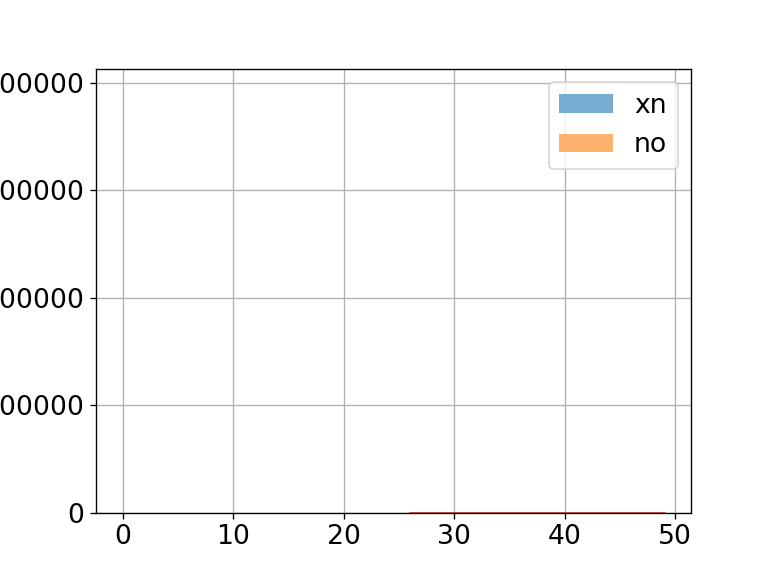

In [713]:
no = pd.read_csv('results/rep-1/no/map-test/samples.chunk', names=['no'])
xn = pd.read_csv('results/rep-1/xn/map-test/samples.chunk', names=['xn'])
d = no.join(xn)
hist_cols(d, ['xn', 'no'], bins=50, alpha=0.6)

In [715]:
no = read_all_metrics(list(Path('./results/rep-1').glob('no/map-test/stats.tsv')))
xn = read_all_metrics(list(Path('./results/rep-1').glob('xn/map-test/stats.tsv')))
no['coll'] = 'no'
xn['coll'] = 'xn'
d = pd.concat([no, xn])

In [716]:
parts = d['name'].str.extract('.*//run//(.*)')
d['metric'] = parts[0]
runtimeStats['map-test'] = d.drop(columns=['name'])

grouped = d.groupby(['coll', 'metric']).mean().unstack('coll')['value']
grouped['rel'] = grouped.loc[:, 'xn'] / grouped.loc[:, 'no']
grouped.loc[([
    'rts//total_wall_seconds',
    'rts//total_cpu_seconds',
    'rts//gen_0_avg_pause_seconds',
    'rts//gen_0_max_pause_seconds',
    'rts//gen_1_avg_pause_seconds',
    'rts//gen_1_max_pause_seconds',
]), :]

coll,no,xn,rel
metric,,,
rts//total_wall_seconds,68.160624,77.880484,1.142602
rts//total_cpu_seconds,68.123884,110.842739,1.627076
rts//gen_0_avg_pause_seconds,0.000297,0.000485,1.632997
rts//gen_0_max_pause_seconds,0.003509,0.004684,1.334853
rts//gen_1_avg_pause_seconds,0.103973,0.000558,0.005367
rts//gen_1_max_pause_seconds,0.462438,0.000767,0.001659


## Search

In [717]:
no = read_all_metrics(list(Path('./results/rep-1').glob('no/search/stats.tsv')))
xn = read_all_metrics(list(Path('./results/rep-1').glob('xn/search/stats.tsv')))
no['coll'] = 'no'
xn['coll'] = 'xn'
d = pd.concat([no, xn])
print(len(d))

159


In [718]:
parts = d['name'].str.extract('.*//run//(.*)')
d['metric'] = parts[0]
runtimeStats['search'] = d.drop(columns=['name'])


grouped = d.groupby(['coll', 'metric']).mean().unstack('coll')['value']
grouped['rel'] = grouped.loc[:, 'xn'] / grouped.loc[:, 'no']
grouped.loc[([
    'rts//total_wall_seconds',
    'rts//total_cpu_seconds',
    'rts//gen_0_avg_pause_seconds',
    'rts//gen_0_max_pause_seconds',
    'rts//gen_1_avg_pause_seconds',
    'rts//gen_1_max_pause_seconds',
]), :]

coll,no,xn,rel
metric,,,
rts//total_wall_seconds,195.130379,231.950497,1.188695
rts//total_cpu_seconds,195.124186,387.009848,1.983403
rts//gen_0_avg_pause_seconds,0.000239,0.000388,1.623431
rts//gen_0_max_pause_seconds,0.004955,0.009058,1.828052
rts//gen_1_avg_pause_seconds,0.682054,0.002973,0.004359
rts//gen_1_max_pause_seconds,4.211551,0.030494,0.007241


## lru-cache

In [7]:
no = read_all_metrics([Path('./results/rep-test/no-n1-r2000/lru-cache/stats.tsv')])
xn = read_all_metrics([Path('./results/rep-test/xn-n1-r2000/lru-cache/stats.tsv')])
no['coll'] = 'no'
xn['coll'] = 'xn'
d = pd.concat([no, xn])
print(len(d))

FileNotFoundError: [Errno 2] File results/rep-test/no-n1-r2000/lru-cache/stats.tsv does not exist: 'results/rep-test/no-n1-r2000/lru-cache/stats.tsv'

In [831]:
parts = d['name'].str.extract('.*//run//(.*)')
d['metric'] = parts[0]
runtimeStats['lru-cache'] = d.drop(columns=['name'])


grouped = d.groupby(['coll', 'metric']).mean().unstack('coll')['value']
grouped['rel'] = grouped.loc[:, 'xn'] / grouped.loc[:, 'no']
grouped.loc[([
    'rts//total_wall_seconds',
    'rts//total_cpu_seconds',
    'rts//gen_0_avg_pause_seconds',
    'rts//gen_0_max_pause_seconds',
    'rts//gen_1_avg_pause_seconds',
    'rts//gen_1_max_pause_seconds',
]), :]

coll,no,xn,rel
metric,,,
rts//total_wall_seconds,309.611089,309.231233,0.998773
rts//total_cpu_seconds,400.529444,400.291184,0.999405
rts//gen_0_avg_pause_seconds,0.001275,0.001584,1.242353
rts//gen_0_max_pause_seconds,0.022780,0.027306,1.198683
rts//gen_1_avg_pause_seconds,0.447662,0.005168,0.011544
rts//gen_1_max_pause_seconds,2.326757,0.018623,0.008004


## Summary

In [849]:
summary = pd.concat([v.assign(test=k) for k,v in runtimeStats.items()])
summary['test'].unique()
summary['metric'] = summary['metric'].astype('category')

In [856]:
metrics = {
    'rts//total_wall_seconds': 'elapsed time',
    'rts//total_cpu_seconds': 'CPU time',
    'rts//mut_wall_seconds': 'mutator elapsed time',
    'rts//mut_cpu_seconds': 'mutator CPU time',
    'rts//gen_0_avg_pause_seconds': 'avg. minor GC pause',
    'rts//gen_0_max_pause_seconds': 'max. minor GC pause',
    'rts//gen_1_avg_pause_seconds': 'avg. major GC pause',
    'rts//gen_1_max_pause_seconds': 'max. major GC pause',
}

xs = summary[summary['metric'].isin(metrics)]
xs['metric'].cat.rename_categories(metrics, inplace=True)
xs = xs.set_index(['metric', 'test', 'coll']).unstack('coll')['value']
xs['rel'] = xs['xn'] / xs['no'] * 100 - 100
table = xs \
  .unstack('test') \
  .reorder_levels(['test', 'coll'], axis=1)\
  .sort_index(axis=1, level=0, ascending=False) \
  .rename(axis=1, level=1, mapper={'xn': 'after', 'no': 'before', 'rel': '% chg'}) \
  .rename(axis=0, level=0, mapper={'search': 'text-search', 'map-test': 'kv-store', 'edit-dist': 'edit-distance'}) \
  .reindex([existing, 'ours', '% chg'], axis=1, level=1) \
  .reindex(['elapsed time', 'CPU time',
            #'mutator elapsed time', 'mutator CPU time',
            'avg. minor GC pause', 'max. minor GC pause',
            'avg. major GC pause', 'max. major GC pause'], axis=0)

def fmtTime(x: float) -> str:
    if x > 1:
        return f'{x:3.1f} s'
    elif x > 1e-3:
        return f'{x/1e-3:3.1f} ms'
    else:
        return f'{x/1e-6:3.1f} us'

fixMinus = lambda s: s #.replace('-', '−')
fmtPct = lambda x: fixMinus(f'{x:+2.0f}%')
n_tests = len(summary['test'].unique())
s = table.to_latex(formatters=[fmtTime, fmtTime, fmtPct] * n_tests,
                   multicolumn_format='c',
                   column_format='l' + 'd' * (3*n_tests))
s = s \
  .replace(' ms', r'\,\mathrm{ms}') \
  .replace(' us', r'\,\mathrm{\mu{}s}') \
  .replace(' s', r'\,\mathrm{s}')
print(s)

table

\begin{tabular}{ldddddddddddd}
\toprule
test &        \,\mathrm{s}earch &       map-test & lru-cache &      edit-dist \\
coll &          \% chg &          \% chg &     \% chg &          \% chg \\
metric              &                &                &           &                \\
\midrule
elapsed time        &         18.9\,\mathrm{s} &         14.3\,\mathrm{s} &       -0\% &  -3540227.0\,\mathrm{\mu{}s} \\
CPU time            &         98.3\,\mathrm{s} &         62.7\,\mathrm{s} &       -0\% &         59.3\,\mathrm{s} \\
avg. minor GC pause &         62.3\,\mathrm{s} &         63.3\,\mathrm{s} &      +24\% &        133.8\,\mathrm{s} \\
max. minor GC pause &         82.8\,\mathrm{s} &         33.5\,\mathrm{s} &      +20\% &         23.0\,\mathrm{s} \\
avg. major GC pause & -99564110.8\,\mathrm{\mu{}s} & -99463322.2\,\mathrm{\mu{}s} &      -99\% & -99946814.6\,\mathrm{\mu{}s} \\
max. major GC pause & -99275943.7\,\mathrm{\mu{}s} & -99834139.9\,\mathrm{\mu{}s} &      -99\% & -99974075.5

test,search,map-test,lru-cache,edit-dist
coll,% chg,% chg,% chg,% chg
metric,,,,
elapsed time,18.869495,14.260227,-0.122688,-3.540227
CPU time,98.340275,62.707603,-0.059486,59.263659
avg. minor GC pause,62.343096,63.299663,24.235294,133.806818
max. minor GC pause,82.805247,33.485323,19.868306,23.011549
avg. major GC pause,-99.564111,-99.463322,-98.845558,-99.946815
max. major GC pause,-99.275944,-99.834140,-99.199616,-99.974076


## Nofib

In [100]:
no = read_all_metrics(Path('./results/rep-1/no-slow').glob('**/*.tsv'))
xn = read_all_metrics(Path('./results/rep-1/xn-slow').glob('**/*.tsv'))
print(len(no), len(xn))

79314 86441


In [101]:
nofibResults = pd.merge(no, xn, on=['name'], how='outer', suffixes=('_no', '_xn'))
nofibResults['ratio'] = nofibResults['value_xn'] / nofibResults['value_no']

In [103]:
def add_nofib_fields(d: pd.Series) -> pd.Series:
    parts = d['name'].str.split('//', n=1)
    result = d.copy()
    result['nofib-test'] = parts.str.get(0)
    result['metric'] = parts.str.get(1)
    return result

nofibResults = add_nofib_fields(nofibResults)

In [127]:
stat = 'total_wall_seconds'

cmp = nofibResults[nofibResults['metric'] == f'run//rts stats//{stat}']
#hist_cols(cmp, ['value_no', 'value_xn'], alpha=0.6)
cmp = cmp[cmp['ratio'].notna()]
cmp.sort_values(by=['ratio'])[50:]

,name,value_no,value_xn,ratio,nofib-test,metric
1991,imaginary/exp3_8//run//rts stats//total_wall_s...,1.040265,1.210391,1.163541,imaginary/exp3_8,run//rts stats//total_wall_seconds
18084,spectral/puzzle//run//rts stats//total_wall_se...,6.660290,7.890414,1.184695,spectral/puzzle,run//rts stats//total_wall_seconds
10384,spectral/hartel/ida//run//rts stats//total_wal...,8.060301,9.660542,1.198534,spectral/hartel/ida,run//rts stats//total_wall_seconds
16929,spectral/hartel/parstof//run//rts stats//total...,7.490283,9.040333,1.206941,spectral/hartel/parstof,run//rts stats//total_wall_seconds
22781,spectral/fft2//run//rts stats//total_wall_seconds,5.450322,6.670346,1.223844,spectral/fft2,run//rts stats//total_wall_seconds
24167,spectral/circsim//run//rts stats//total_wall_s...,7.780289,9.710609,1.248104,spectral/circsim,run//rts stats//total_wall_seconds
32175,spectral/cichelli//run//rts stats//total_wall_...,7.190282,9.030382,1.255915,spectral/cichelli,run//rts stats//total_wall_seconds
76989,real/anna//run//rts stats//total_wall_seconds,7.480282,9.440414,1.262040,real/anna,run//rts stats//total_wall_seconds
23782,spectral/gcd//run//rts stats//total_wall_seconds,5.200512,6.570407,1.263415,spectral/gcd,run//rts stats//total_wall_seconds
7073,spectral/simple//run//rts stats//total_wall_se...,8.770292,11.420372,1.302166,spectral/simple,run//rts stats//total_wall_seconds


In [120]:
cmp['ratio'].min()

0.8962706154494009

<IPython.core.display.Javascript object>


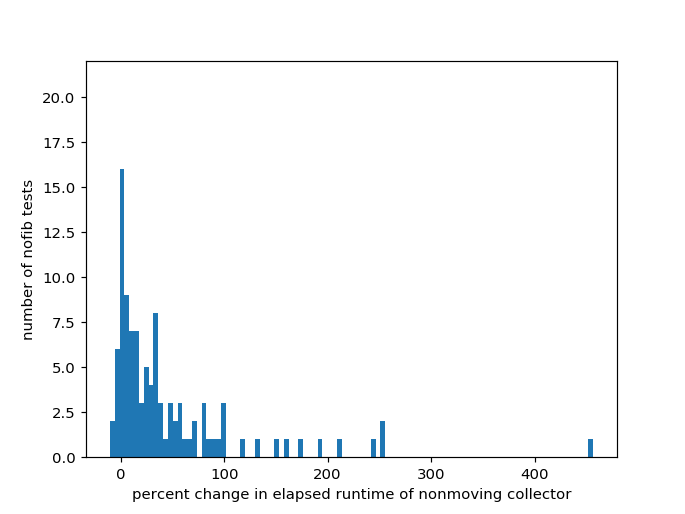

1.4474809380520473 1.2069414466716413 1.3448775113412235


In [121]:
h = pl.hist(cmp[cmp['value_no'] > 0.05]['ratio']*100-100, bins=100)
pl.ylim(0, 22)
pl.xlabel('percent change in elapsed runtime of nonmoving collector')
pl.ylabel('number of nofib tests');
print(np.mean(cmp['ratio']), np.median(cmp['ratio']), scipy.stats.gmean(cmp['ratio']))

Text(0, 0.5, 'elapsed runtime (seconds)')

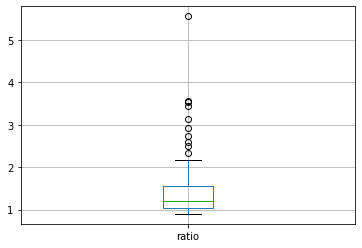

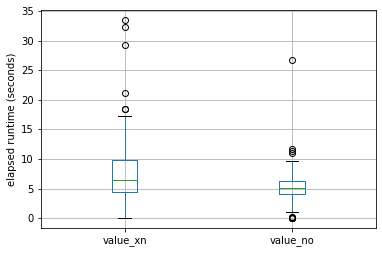

In [72]:
pl.figure()
pd.plotting.boxplot(cmp, column=['ratio'])

pl.figure()
pd.plotting.boxplot(cmp, column=['value_xn', 'value_no'])
pl.ylabel('elapsed runtime (seconds)')

<IPython.core.display.Javascript object>


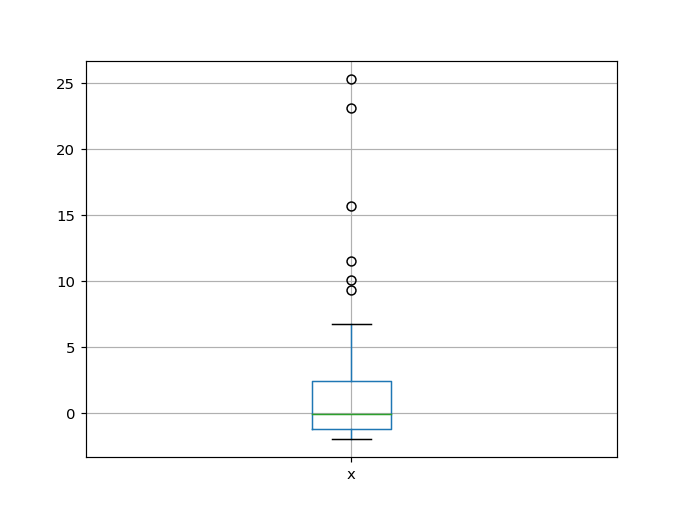

In [106]:
pause_metrics = [
    f'run//rts stats//{stat}'
    for stat in [
        'gen_0_max_pause_seconds',
        'gen_1_max_pause_seconds',
        'nonmoving_sync_max_pause_seconds',
    ]
]

def only_pauses(d: pd.Series):
    return pd.concat([d[d['metric'] == metric] for metric in pause_metrics])

def compute_nofib_max_pause(d: pd.Series):
    d2 = add_nofib_fields(d)
    return only_pauses(d2) \
        .groupby('nofib-test') \
        .max()['value']

max_pauses = pd.merge(compute_nofib_max_pause(xn),
                      compute_nofib_max_pause(no),
                      suffixes=('_xn', '_no'),
                      on='nofib-test')
max_pauses['ratio'] = max_pauses['value_xn'] / max_pauses['value_no'] - 1
pl.figure()
pd.plotting.boxplot(max_pauses['ratio'] - 1)

<IPython.core.display.Javascript object>


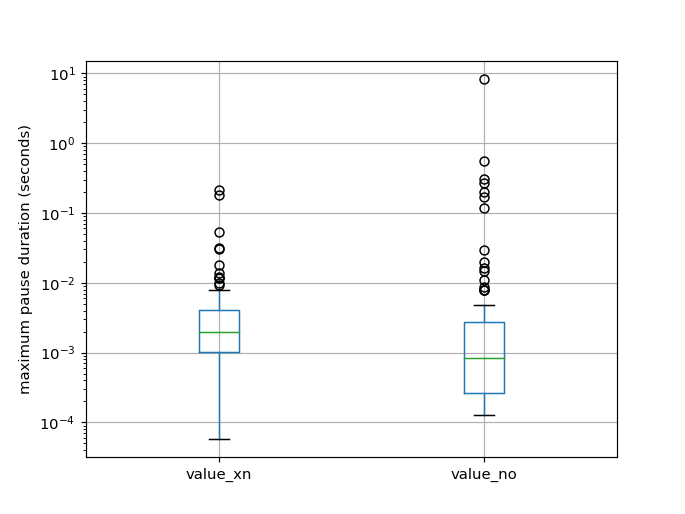

Text(0, 0.5, 'maximum pause duration (seconds)')

In [107]:
pl.figure()
pd.plotting.boxplot(max_pauses, column=['value_xn', 'value_no'])
pl.yscale('log')
pl.ylabel('maximum pause duration (seconds)')

In [108]:
# Pauses
from IPython.display import display, HTML
with pd.option_context('display.max_rows', 500):
    display(max_pauses.sort_values(by=['ratio']))

,value_xn,value_no,ratio
nofib-test,,,
gc/mutstore1,0.004516,0.554591,-0.991857
gc/hash,0.182224,8.191208,-0.977754
gc/mutstore2,0.018033,0.308660,-0.941576
imaginary/bernouilli,0.001422,0.008008,-0.822428
gc/lcss,0.031421,0.172051,-0.817374
gc/fulsom,0.052643,0.273105,-0.807243
real/fulsom,0.001697,0.007992,-0.787663
real/grep,0.000753,0.003354,-0.775492
spectral/treejoin,0.004414,0.019616,-0.774980


### nofib notes

Running in slow speed.

* `parfib` performs essentially no GC (max, avg pause < 1ms with `-N1`)
* `life` also has no pauses to speak of. Both mutator and GC time nearly double under the nonmoving collector. Strangely it runs for only 7 seconds with no-xn yet performs almost 2500 major GCs

   Running with `-A8M` drops major GC count to 5, runtime drops to 5.5 seconds, difference between `xn` and `no-xn` essentially vanishes.
* `atom`: Even with `-A8M` GC time increases by factor of 15! MUT time by factor of 3 with `xn`. Yikes: residency increases from 140kB to 44MB.

   Hmm, interesting: under `no-xn` it performs only 2 major GCs; with `xn` it performs nearly 60. Moreover, Bytes copied increases by factor of 4. Nothing particularly interesting about program; it's very list-y, lots of (inappropriate) laziness but nothing
   
   Hypothesis: program out-runs major GC, leading to enlarged heap and later more GC work.
* `knights`: 10% slower with `xn` overall. No pauses to note
* `mutstore1`: Spends nearly entire time in a single major GC

<IPython.core.display.Javascript object>


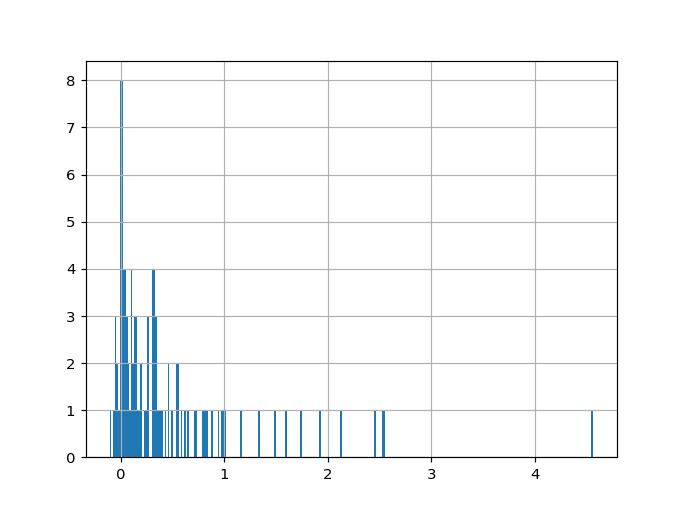

0.4474809380520468


<IPython.core.display.Javascript object>


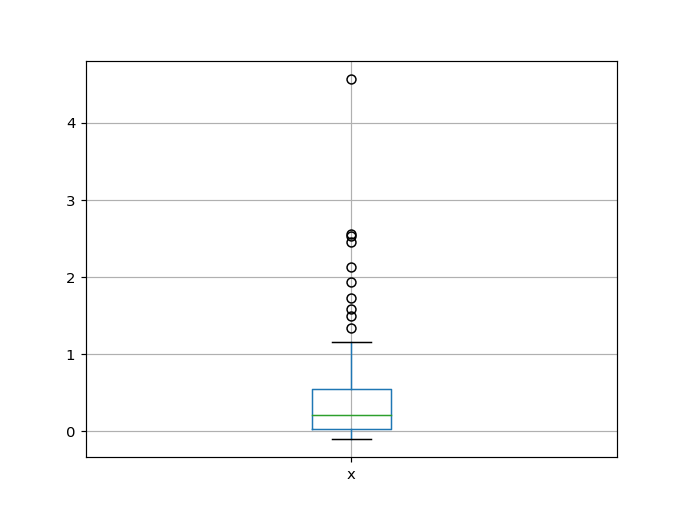

In [109]:
pl.figure()
rel = cmp['value_xn'] / cmp['value_no'] - 1
rel.hist(bins=300)
print(rel.mean())

pl.figure()
pd.plotting.boxplot(rel)

In [17]:
only_pauses(add_nofib_fields(result))

,name,value_no,value_xn,ratio,nofib-test,metric
22,imaginary/kahan//run//rts stats//gen_0_max_pau...,0.000056,0.000043,0.767857,imaginary/kahan,run//rts stats//gen_0_max_pause_seconds
407,imaginary/primes//run//rts stats//gen_0_max_pa...,0.000393,0.002402,6.111959,imaginary/primes,run//rts stats//gen_0_max_pause_seconds
792,imaginary/paraffins//run//rts stats//gen_0_max...,0.001345,0.005648,4.199257,imaginary/paraffins,run//rts stats//gen_0_max_pause_seconds
1177,imaginary/x2n1//run//rts stats//gen_0_max_paus...,0.005320,0.003670,0.689850,imaginary/x2n1,run//rts stats//gen_0_max_pause_seconds
1562,imaginary/integrate//run//rts stats//gen_0_max...,0.003080,0.003665,1.189935,imaginary/integrate,run//rts stats//gen_0_max_pause_seconds
...,...,...,...,...,...,...
172566,gc/treejoin//run//rts stats//nonmoving_sync_ma...,NaN,0.009197,NaN,gc/treejoin,run//rts stats//nonmoving_sync_max_pause_seconds
172587,gc/gc_bench//run//rts stats//nonmoving_sync_ma...,NaN,0.005356,NaN,gc/gc_bench,run//rts stats//nonmoving_sync_max_pause_seconds
172608,gc/cacheprof//run//rts stats//nonmoving_sync_m...,NaN,0.025522,NaN,gc/cacheprof,run//rts stats//nonmoving_sync_max_pause_seconds
172657,gc/constraints//run//rts stats//nonmoving_sync...,NaN,0.030759,NaN,gc/constraints,run//rts stats//nonmoving_sync_max_pause_seconds


# GC stats analysis (eventlog)

In [18]:
def read_gc_stats(p: Path) -> pd.Series:
    return pd.read_csv(p, sep='\t', names=['req_t', 'gen', 'dur'], usecols=[0,1,2])

In [230]:
def hist_gc_pauses(series: Dict[str, pd.Series], bins: int = 50, log: bool = True, t_max = None, **kwargs):
    pl.figure()
    pl.gca().set_prop_cycle(cyc)
    if t_max is None:
        t_max = max(xs.max() for xs in series.values()) * 1000
    for lbl,xs in series.items():
        pl.hist(xs*1000, label=lbl, range=(0, t_max),
                log=log, bins=bins, histtype='step', alpha=0.9, **kwargs)
        
    pl.xlim(0, 1.1*t_max)
    pl.legend()
    pl.ylabel('Number of occurrences')
    pl.xlabel('Latency (milliseconds)')

In [231]:
def plot_gc_pauses(series: Dict[str, pd.Series], gen: Optional[int] = None, **kwargs):
    if gen is not None:
        series = {k: v[v['gen'] == gen] for k,v in series.items()}

    series = {k: v['dur'] for k,v in series.items()}
    hist_gc_pauses(series, **kwargs)

In [232]:
test = 'n8-r4000'

no = read_gc_stats(Path(f'./results/rep-1/no-{test}/lru-cache/eventlog.tsv'))
xn = read_gc_stats(Path(f'./results/rep-1/xn-{test}/lru-cache/eventlog.tsv'))
print(len(no), len(xn))

20430 20386


In [233]:
test = 'map-test'
no = read_gc_stats(Path(f'./results/rep-1/no/{test}/eventlog.tsv'))
xn = read_gc_stats(Path(f'./results/rep-1/xn/{test}/eventlog.tsv'))
print(len(no), len(xn))

40892 40893


<IPython.core.display.Javascript object>


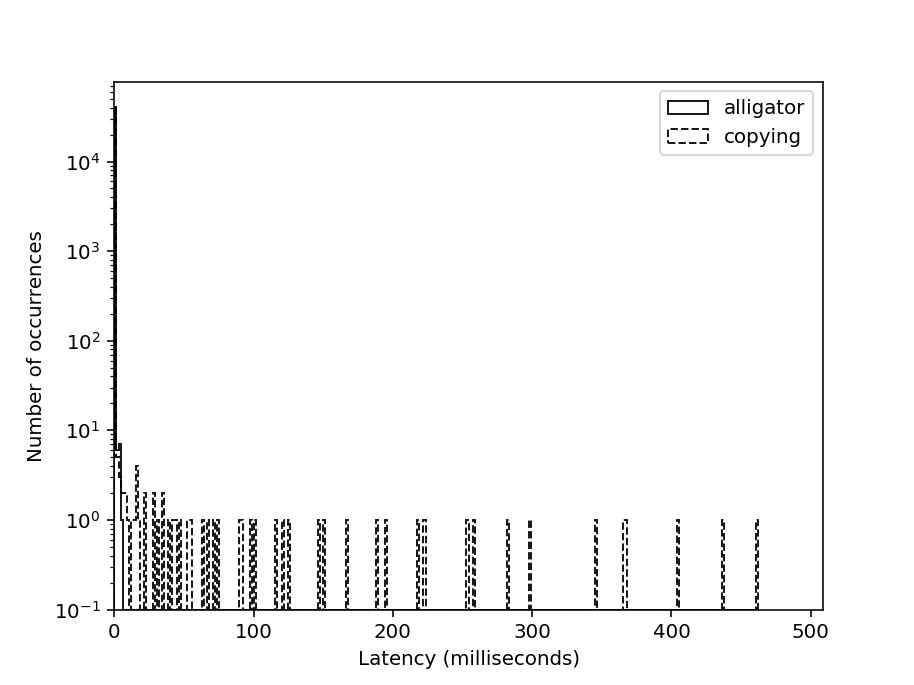

In [234]:
plot_gc_pauses({
    system: xn,
    existing: no,
}, gen=None, bins=300)

Text(0.5, 0, 'Latency (milliseconds)')

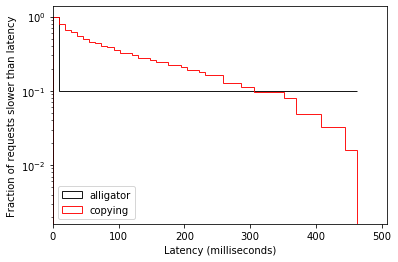

In [24]:
# Major GCs only
plot_gc_pauses({
    system: xn,
    existing: no,
}, gen=1, density=True, cumulative=-1)
pl.ylabel('Fraction of requests slower than latency')
pl.xlabel('Latency (milliseconds)')

In [273]:
def plot_percentile_spectrum(series: Dict[str, pd.Series]):
    pl.figure()
    pl.gca().set_prop_cycle(cyc)
    percentiles = 1 - np.logspace(-6, -0.1, 100)
    for lbl, xs in series.items():
        q = xs.quantile(percentiles, interpolation='lower')
        pl.plot(1-percentiles, q, label=lbl)
        
    pl.xscale('log')
    pl.gca().invert_xaxis()
    pl.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: '%g%%' % ((1-x)*100)))
    pl.xlim(1, None)
    pl.ylim(0, None)
    pl.xlabel('Percentile')
    pl.ylabel('Latency (seconds)')
    pl.legend()

<IPython.core.display.Javascript object>


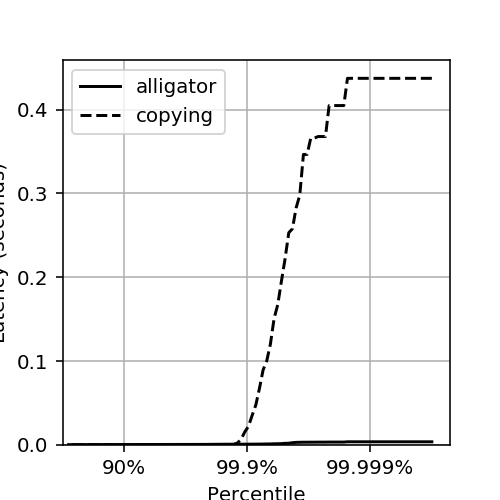

In [236]:
plot_percentile_spectrum({system: xn['dur'], existing: no['dur']})
pl.gca().grid()
pl.savefig('gc-pause-hist.svg', bbox_inches='tight')

# `wrk2` histograms

In [238]:
def read_wrk2(path: Path) -> pd.Series:
    import re
    f = path.open('r')
    for line in f:
        if re.match('\s+Detailed', line):
            break

    f.readline()
    f.readline()
    
    ls = []
    for line in f:
        if re.match('#\[Mean', line):
            break
        ls.append(line)
        
    from io import StringIO
    return pd.read_csv(StringIO('\n'.join(ls)),
                       names=['value', 'percentile', 'total_count', 'inv_percentile'],
                       delim_whitespace=True)

In [394]:
def plot_wrk2(series: Dict[str, pd.Series]):
    pl.figure()
    pl.gca().set_prop_cycle(cyc)
    for lbl, xs in series.items():
        pl.semilogx(1-xs['percentile'], xs['value']*1e-3, label=lbl)
        
    pl.gca().invert_xaxis()
    pl.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, _: '%g%%' % ((1-x)*100)))
    pl.legend()
    pl.xlim(1, None)
    pl.ylim(0, None)
    pl.xlabel('Percentile')
    pl.ylabel('Latency (seconds)')

In [395]:
results = Path('results/rep-11')
experiments = [
    (d, Path(str(d).replace('xn-', 'no-')))
    for d in results.glob('xn-*')
]

for xn,no in experiments:
    test = xn.parts[2].replace('xn-', '')
    try:
        plot_wrk2({
            existing: read_wrk2(no / "lru-cache/wrk2-2.out"),
            system: read_wrk2(xn / "lru-cache/wrk2-2.out"),
        })
        pl.ylim(0, 2e3)
        pl.xlim(1, 1e-5)
        pl.suptitle(test)
        pl.savefig(f'lru-cache-{test}.svg')
    except Exception as e:
        print(f'error in {test}; {e}')

<IPython.core.display.Javascript object>


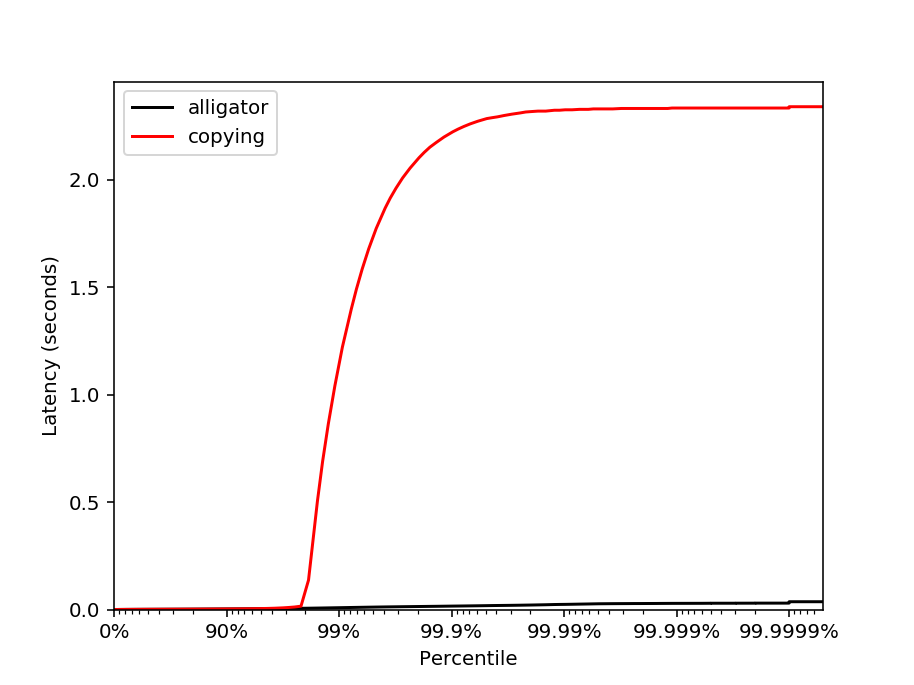

In [396]:
test = 'n1-r2000'
seg = 2

plot_wrk2({
    system:   read_wrk2(Path(f'./results/rep-1/xn-{test}/lru-cache/wrk2-{seg}.out')),
    existing: read_wrk2(Path(f'./results/rep-1/no-{test}/lru-cache/wrk2-{seg}.out')),
})

## Mark FIFO

Measurements taken with
```bash
$ for i in 1 2 3 4 5 6 7; do bash run-mark-fifo-exp.sh $i; done
```

On `ben-server`, and `maurer`.

```
#!/usr/bin/env bash
# run-mark-fifo-exp.sh

set -ex

N=$1
ghc_dir=$HOME/ghc/ghc-gc
HC=$ghc_dir/_build/stage1/bin/ghc
cabal_dir=$ghc_dir/Cabal

git -C $ghc_dir checkout rts/sm/NonMovingMark.h
git -C $ghc_dir apply - <<EOF
diff --git a/rts/sm/NonMovingMark.h b/rts/sm/NonMovingMark.h
index 1e3fb01bd2..23f3bd99b7 100644
--- a/rts/sm/NonMovingMark.h
+++ b/rts/sm/NonMovingMark.h
@@ -77,7 +77,7 @@ typedef struct {
 } MarkQueueBlock;
 
 // How far ahead in mark queue to prefetch?
-#define MARK_PREFETCH_QUEUE_DEPTH 5
+#define MARK_PREFETCH_QUEUE_DEPTH $N
 
 /* The mark queue is not capable of concurrent read or write.
  *
@@ -97,9 +97,9 @@ typedef struct MarkQueue_ {
     // Is this a mark queue or a capability-local update remembered set?
     bool is_upd_rem_set;
 
-#if MARK_PREFETCH_QUEUE_DEPTH > 0
+#if 1
     // A ring-buffer of entries which we will mark next
-    MarkQueueEnt prefetch_queue[MARK_PREFETCH_QUEUE_DEPTH];
+    MarkQueueEnt prefetch_queue[16];
     // The first free slot in prefetch_queue.
     uint8_t prefetch_head;
 #endif
EOF

(
  cd $ghc_dir
  hadrian/build.cabal.sh -j9 --freeze1
)

(
  cd $cabal_dir; 
  $HOME/ghc-utils/ghc_perf.py \
    -e cycles,instructions,cache-references,cache-misses \
    -s -r3 -o results/mark-fifo/depth$N -- \
    $HC +RTS -s -xn -RTS Cabal/Setup.hs -iCabal -fforce-recomp -O
)
```

In [488]:
root = Path('/home/ben/ghc/gc-benchmarks/benchmarks/results/mark-fifo-ben-server/mark-fifo')
stats = pd.concat([
    read_metrics(root / f'depth{n}').assign(n=n)
    for n in [1,2,3,4,5,6,7,12,15]], sort=False)

#stats['i'] = stats.index.values
stats = stats.groupby(['n', 'name']).mean().reset_index()
stats

,n,name,value
0,1,ghc//run//perf//cache-misses,3.097462e+09
1,1,ghc//run//perf//cache-references,1.127896e+10
2,1,ghc//run//perf//cycles,9.333338e+11
3,1,ghc//run//perf//instructions,8.866714e+11
4,1,ghc//run//rts//GC_cpu_seconds,3.549395e+01
...,...,...,...
778,15,ghc//run//rts//whitehole_lockClosure_spin,0.000000e+00
779,15,ghc//run//rts//whitehole_lockClosure_yield,0.000000e+00
780,15,ghc//run//rts//whitehole_threadPaused_spin,0.000000e+00
781,15,ghc//run//rts//work_balance,0.000000e+00


In [502]:
table = stats[stats['name'].str.match('ghc//run//perf//')].set_index(['n', 'name']).unstack()['value']
table = table.rename(columns={
    'ghc//run//perf//cache-misses': 'cache-misses',
    'ghc//run//perf//cache-references': 'cache-refs',
    'ghc//run//perf//cycles': 'cycles',
    'ghc//run//perf//instructions': 'instructions',
})
table['hit-rate'] = 1 - table['cache-misses'] / table['cache-refs']
table

name,cache-misses,cache-refs,cycles,instructions,hit-rate
n,,,,,
1,3.097462e+09,1.127896e+10,9.333338e+11,8.866714e+11,0.725377
2,3.131388e+09,1.131498e+10,9.258118e+11,8.901690e+11,0.723253
3,3.111093e+09,1.128712e+10,9.230559e+11,8.919982e+11,0.724368
4,3.117395e+09,1.135746e+10,9.236147e+11,8.891293e+11,0.725520
5,3.103889e+09,1.131895e+10,9.238353e+11,8.917296e+11,0.725779
6,3.097247e+09,1.134165e+10,9.241656e+11,8.909148e+11,0.726914
7,3.117560e+09,1.137365e+10,9.341010e+11,9.025513e+11,0.725896
12,3.112017e+09,1.132608e+10,9.289797e+11,8.961800e+11,0.725234
15,3.119349e+09,1.135696e+10,9.303941e+11,8.954351e+11,0.725336


<IPython.core.display.Javascript object>


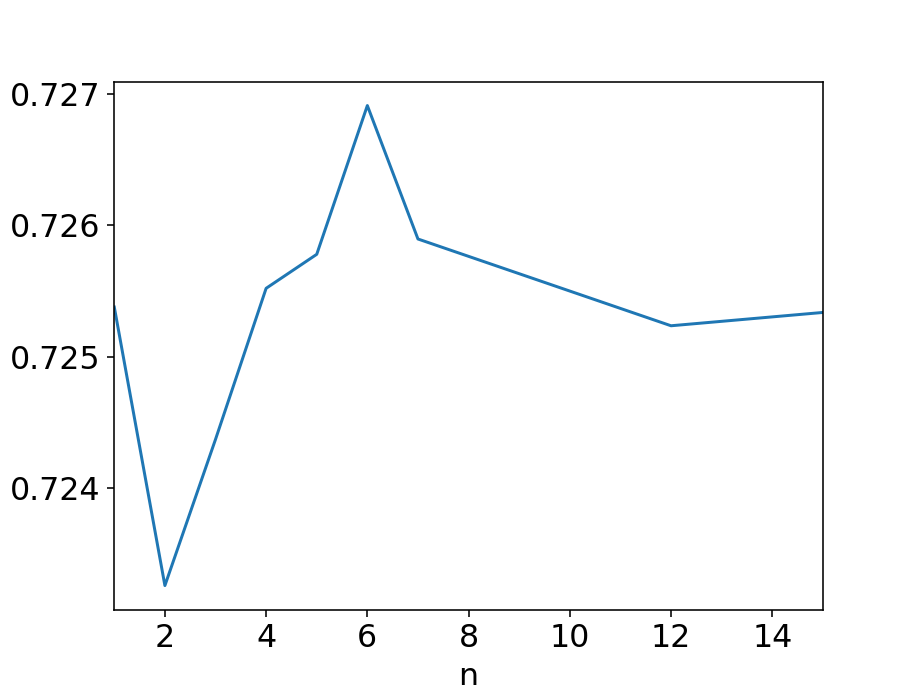

In [503]:
pl.figure()
table['hit-rate'].plot()


# Paper figures

In [405]:
matplotlib.rcParams.update({'font.size': 16})

## lru-cache (wrk2)

<IPython.core.display.Javascript object>


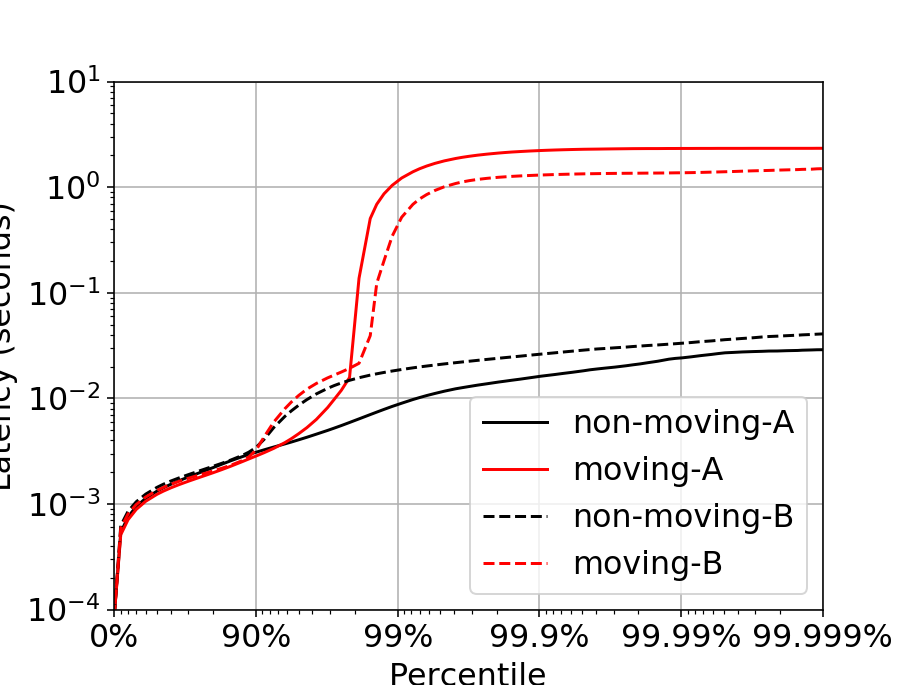

In [412]:
test1 = 'n1-r2000'
test2 = 'n8-r8000'
seg = 2

plot_wrk2({
    'non-moving-A': read_wrk2(Path(f'./results/rep-1/xn-{test1}/lru-cache/wrk2-{seg}.out')),
    'moving-A': read_wrk2(Path(f'./results/rep-1/no-{test1}/lru-cache/wrk2-{seg}.out')),
    'non-moving-B': read_wrk2(Path(f'./results/rep-1/xn-{test2}/lru-cache/wrk2-{seg}.out')),
    'moving-B': read_wrk2(Path(f'./results/rep-1/no-{test2}/lru-cache/wrk2-{seg}.out')),
})
pl.grid()
pl.ylim(1e-4, 10)
pl.xlim(1, 0.00001)
pl.yscale('log')
pl.savefig('lru-cache-resp-time.svg', bbox_inches='tight')

## lru-cache (gc)

<IPython.core.display.Javascript object>


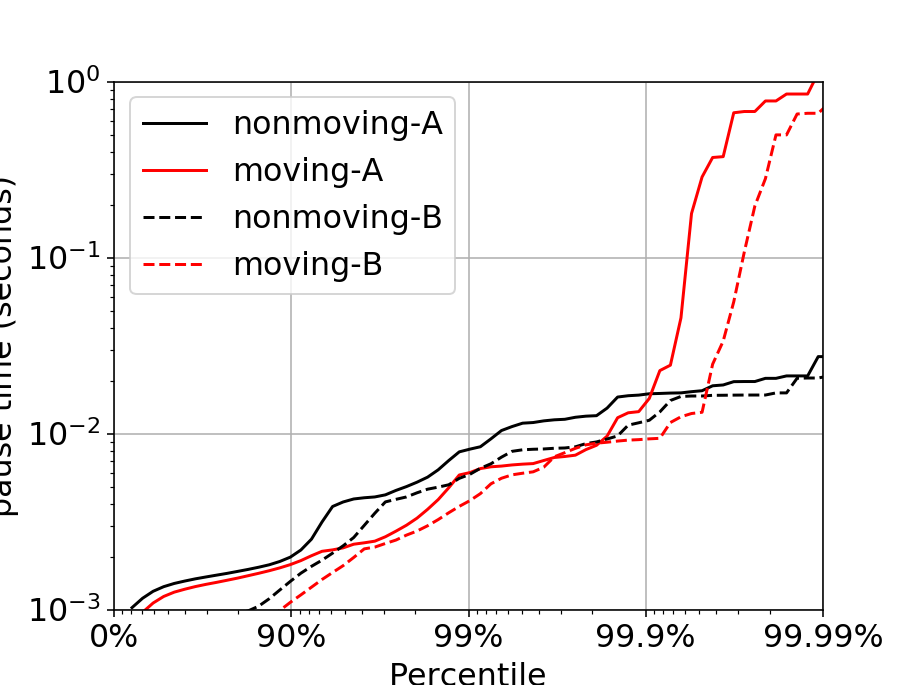

In [413]:
plot_percentile_spectrum({
    'nonmoving-A': read_gc_stats(Path(f'./results/rep-1/xn-{test1}/lru-cache/eventlog.tsv'))['dur'],
    'moving-A': read_gc_stats(Path(f'./results/rep-1/no-{test1}/lru-cache/eventlog.tsv'))['dur'],
    'nonmoving-B': read_gc_stats(Path(f'./results/rep-1/xn-{test2}/lru-cache/eventlog.tsv'))['dur'],
    'moving-B': read_gc_stats(Path(f'./results/rep-1/no-{test2}/lru-cache/eventlog.tsv'))['dur'],
})
pl.gca().grid()
pl.xlim(1, 0.0001)
pl.ylim(1e-3, 1)
pl.ylabel('pause time (seconds)')
pl.yscale('log')

pl.savefig('lru-cache-gc-pause.svg', bbox_inches='tight')

## nofib

<IPython.core.display.Javascript object>


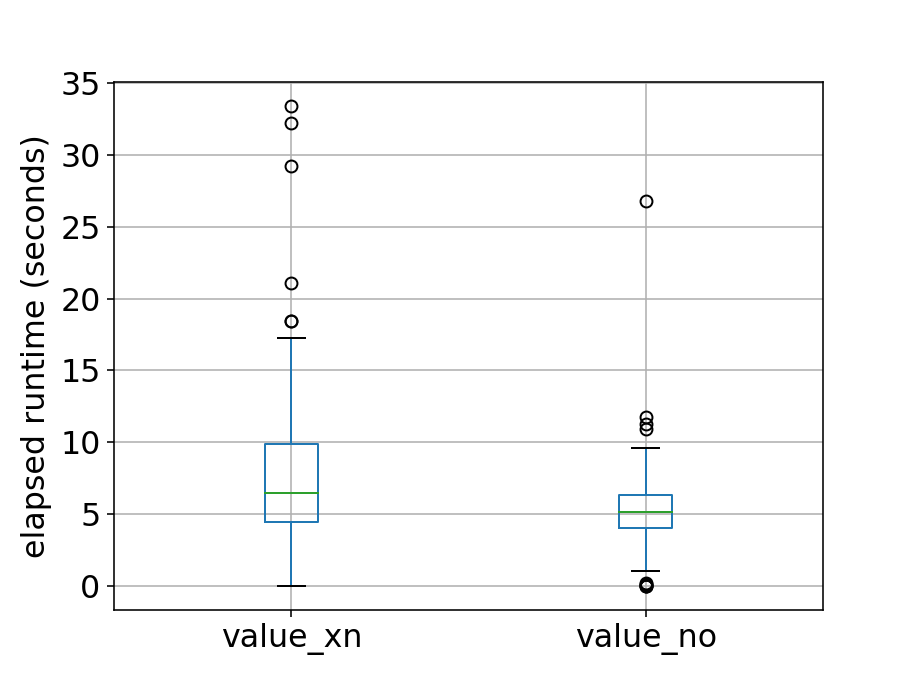

Text(0, 0.5, 'elapsed runtime (seconds)')

In [414]:
stat = 'total_wall_seconds'

cmp = nofibResults[nofibResults['metric'] == f'run//rts stats//{stat}']
pl.figure()
pd.plotting.boxplot(cmp.rename(columns={'xn': 'non-moving', 'no': 'copying'}),
                    column=['value_xn', 'value_no'])
pl.ylabel('elapsed runtime (seconds)')

In [168]:
metrics = {
    'run//rts stats//total_wall_seconds': 'total-wall',
    #'run//rts stats//GC_cpu_seconds': 'gc-cpu',
    'run//rts stats//GC_wall_seconds': 'gc-wall',
    #'run//rts stats//gen_0_collections': 'gen0-colls',
    #'run//rts stats//gen_0_cpu_seconds': 'gen0-cpu',
    #'run//rts stats//gen_0_max_pause_seconds': 'gen0-max-pause',
    #'run//rts stats//gen_1_collections': 'gen1-colls',
    #'run//rts stats//gen_1_cpu_seconds': 'gen1-cpu',
    'run//rts stats//gen_1_max_pause_seconds': 'gen1-max-pause',
}

results = nofibResults.set_index(['nofib-test', 'metric']).join(
        pd.DataFrame({'metric': list(metrics.keys())}).set_index('metric'),
        how='right') \
    .drop(columns=['name', 'ratio']) \
    .unstack('metric') \
    .rename(columns=metrics)
#results.to_latex(float_format='%0.2f')
results

value_no                            value_xn            \
metric              total-wall   gc-wall gen1-max-pause total-wall   gc-wall   
nofib-test                                                                     
imaginary/kahan       6.300307  0.029212       0.000206   5.950423  0.028291   
imaginary/primes      3.530279  0.798476       0.000296  12.180327  6.862180   
imaginary/paraffins   5.010279  4.150027       0.004846   6.600409  5.567265   
imaginary/x2n1        2.840391  0.002750       0.000132   2.890332  0.002814   
imaginary/integrate   3.040334  0.050899       0.000226   5.020307  1.814616   
...                        ...       ...            ...        ...       ...   
gc/mutstore1          2.600295  2.124041       0.554591   2.330568  1.791073   
gc/treejoin           0.130286  0.079367       0.016524   0.200431  0.100048   
gc/cacheprof          0.210284  0.048041       0.008688   0.300339  0.108909   
gc/constraints        9.020439  5.913221       0.202684   9.600537  5.299811   
gc/mutstore2          3.950284  3.765824       0.308660   4.000507  3.527375   

                                    
metric              gen1-max-pause  
nofib-test                          
imaginary/kahan           0.000109  
imaginary/primes          0.004272  
imaginary/paraffins       0.002025  
imaginary/x2n1            0.000240  
imaginary/integrate       0.000304  
...                            ...  
gc/mutstore1              0.000913  
gc/treejoin               0.010454  
gc/cacheprof              0.005300  
gc/constraints            0.148986  
gc/mutstore2              0.008852  

[108 rows x 6 columns]

## Heap fragmentation


In [415]:
segment_size = 2**15

census = pd.read_csv(
    'cabal-census.tsv',
    delimiter='\t', 
    names=['time', 'blk_size', 'active_segs', 'filled_segs', 'live_blks', 'occupancy'])
census['live_bytes'] = census['live_blks'] * 2**census['blk_size']
census['segment_bytes'] = (census['active_segs'] + census['filled_segs']) * segment_size
census

,time,blk_size,active_segs,filled_segs,live_blks,occupancy,live_bytes,segment_bytes
0,19304486,3,1,0,0,0.000000,0,32768
1,19305536,4,1,2,3852,0.627566,61632,98304
2,19308806,5,1,67,66464,0.955437,2126848,2228224
3,19311606,6,1,44,22132,0.962470,1416448,1474560
4,19311826,7,1,0,2,0.007843,256,32768
...,...,...,...,...,...,...,...,...
415,177589586830,10,10,0,164,0.529032,167936,327680
416,177589601029,11,30,22,623,0.798718,1275904,1703936
417,177589612989,12,4,51,370,0.961039,1515520,1802240
418,177589613199,13,1,0,0,0.000000,0,32768


In [416]:
collCensuses = census.set_index(['blk_size','time'])
collCensuses = collCensuses.groupby('blk_size').apply(lambda x: x.assign(n=np.arange(len(x))))
collCensuses = collCensuses.reset_index().set_index(['n', 'blk_size']).unstack('blk_size')
collCensuses

time                                            \
blk_size            3             4             5             6    
n                                                                  
0             19304486      19305536      19308806      19311606   
1             71020785      71033355      71119364      71132884   
2            309007929     309027919     309084209     309097069   
3            823784099     823799359     823891989     823914719   
4           1052375494    1052398534    1052460043    1052510283   
5           1235510630    1235702599    1236202636    1236432014   
6           1621242127    1621836074    1623982130    1624579696   
7           2255654990    2256188217    2258701171    2259465116   
8           2853914006    2854564781    2856565619    2857477813   
9           3964632546    3965449071    3968116864    3968905669   
10          5139221927    5140090111    5142692965    5143607999   
11          7000328988    7001604840    7005872392    7007120524   
12          8410204061    8411144965    8414355564    8415370108   
13         11056781688   11057843052   11061363499   11062453112   
14         13963077712   13964536083   13968710846   13970073187   
15         16071763499   16073129280   16077147614   16078451916   
16         18095310630   18096719792   18101053804   18102469595   
17         20693204933   20694677204   20698828077   20700174649   
18         25910024756   25911620845   25916097887   25917647537   
19         29498781732   29500478221   29505959226   29507249287   
20         31761400586   31762467839   31770737056   31772009538   
21         34343361984   34344586496   34352321207   34354125535   
22         37353538951   37354076237   37361313641   37364106023   
23         41670841585   41671917558   41680595383   41684706276   
24         46626135905   46628224362   46644118440   46647865946   
25         66350837081   66353098707   66369112654   66371960976   
26         74535894078   74538110873   74550547874   74554286880   
27         88146153096   88149000398   88169729266   88174416805   
28        102879019900  102881626544  102897739661  102901111519   
29        112480037939  112482695832  112499810252  112503196970   
30        118853342234  118856323685  118873551525  118880407261   
31        128309142506  128312817073  128335122090  128341301471   
32        150057115219  150060523417  150078674711  150083652290   
33        157498851096  157502365524  157522080198  157528482657   
34        177553873228  177558727227  177581425722  177588296288   

                                                                  \
blk_size            7             8             9             10   
n                                                                  
0             19311826      19312006      19312176      19312366   
1             71133314      71134094      71134294      71134504   
2            309097689     309098719     309098909     309099169   
3            823915689     823917479     823917719     823918119   
4           1052513023    1052514423    1052514623    1052515783   
5           1236441014    1236443424    1236443724    1236444474   
6           1624598186    1624602986    1624603406    1624605456   
7           2259497696    2259503966    2259505076    2259507956   
8           2857528663    2857535602    2857536352    2857539202   
9           3968979578    3968984368    3968985048    3968987628   
10          5143716568    5143722798    5143723568    5143730408   
11          7007250734    7007260314    7007261414    7007264714   
12          8415500567    8415507367    8415508057    8415510557   
13         11062600411   11062608141   11062608861   11062614921   
14         13970247646   13970256726   13970257476   13970260486   
15         16078616945   16078625855   16078626605   16078629105   
16         18102656623   18102659553   18102660643   18102665763   
17         20700382667   20700390897   20700391597   20700394517   
18   

<IPython.core.display.Javascript object>


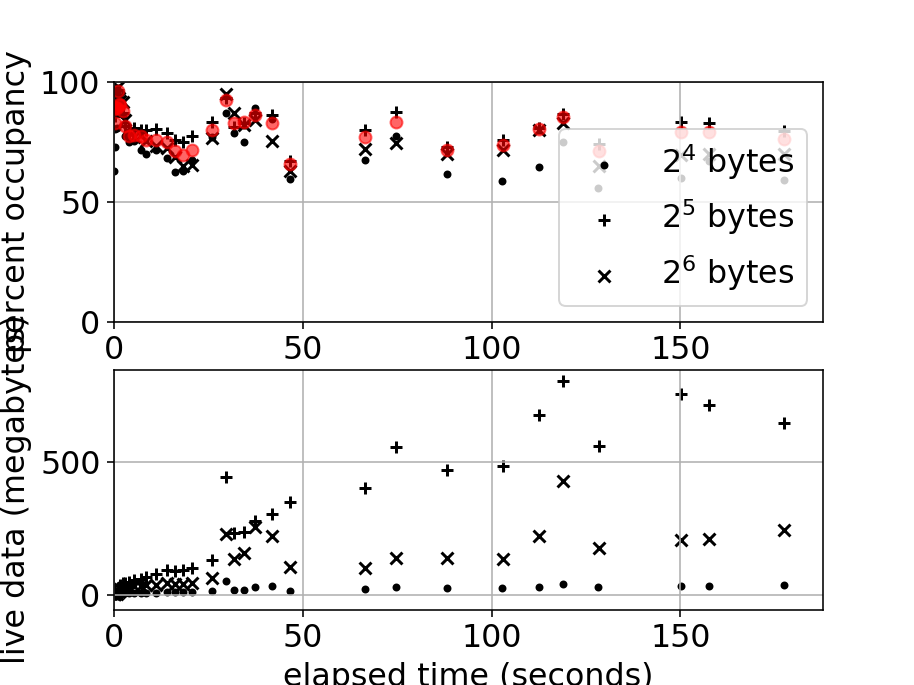

/nix/store/cif6layixbk9ncy3fp5hfpgn9lrm4883-python3-3.7.5-env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
/nix/store/cif6layixbk9ncy3fp5hfpgn9lrm4883-python3-3.7.5-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/nix/store/cif6layixbk9ncy3fp5hfpgn9lrm4883-pytho

n
0     0.886296
1     0.827069
2     0.895624
3     0.889409
4     0.960347
5     0.906438
6     0.900499
7     0.875903
8     0.813056
9     0.773980
10    0.779196
11    0.773294
12    0.756985
13    0.758407
14    0.749909
15    0.712040
16    0.695398
17    0.714081
18    0.796246
19    0.923695
20    0.825874
21    0.830980
22    0.862121
23    0.828501
24    0.656722
25    0.769482
26    0.830942
27    0.716688
28    0.736046
29    0.803060
30    0.852492
31    0.708972
32    0.788672
33    0.790041
34    0.759026
dtype: float64


In [417]:
pl.figure()

for marker, i in zip('.+x', [4,5,6]):
    xs = census.set_index(['blk_size','time'], drop=False).loc[i]
    pl.subplot(211)
    pl.scatter(xs['time'] / 1e9,
               xs['occupancy'] * 100,
               marker=marker, c='k',
               label=f'$2^{i}$ bytes')
    
    pl.subplot(212)
    pl.scatter(xs['time'] / 1e9,
               xs['live_blks'] * 2**i / 1024 / 1024,
               marker=marker, c='k',
               label=f'$2^{i}$ bytes')

pl.subplot(211)

if True:
    overall = collCensuses.stack().reset_index().groupby('n') \
        .agg({'time': np.mean, 'live_bytes': np.sum, 'segment_bytes': np.sum})
    occ = overall['live_bytes'] / overall['segment_bytes']
    pl.plot(overall['time'] / 1e9,
            100.0 * occ,
            'ro',
            alpha=0.6
           )

pl.subplot(211)
pl.ylim(0,100)
pl.xlim(0, None)
pl.grid()
pl.ylabel('percent occupancy')
pl.legend()

pl.subplot(212)
pl.xlim(0, None)
pl.ylabel('live data (megabytes)')
pl.xlabel('elapsed time (seconds)')
pl.grid()

pl.savefig('cabal-occupancy.svg', bbox_inches='tight')

In [419]:
total = collCensuses['live_bytes'].sum(axis=1)
total;

In [423]:
heap_frac = 100.0 * collCensuses['live_bytes'].div(total, axis=0)
heap_frac;

## Write barrier overhead

In [889]:
path = Path('./results/rep-1/xn-n8-r8000/lru-cache')

In [898]:
requests = pd.read_csv(path / 'eventlog.reqs.samples', names=['start','stop','dur'], sep=' ')

In [899]:
import json
major_gcs = [(gc['markPhases'][0][0][0], gc['markPhases'][-1][0][1])
             for gc in json.load(open(path / 'eventlognonmoving-gcs.json')) ]
json.load(open(path / 'eventlognonmoving-gcs.json'));

In [900]:
major_gcs

[(16497434, 20861059),
 (33278957, 62609577),
 (88081309, 145889403),
 (221982982, 320155132),
 (527418799, 718871808),
 (1301349638, 1783570600),
 (3068938122, 4277199732),
 (6982864065, 7940868108),
 (8247302921, 8248486844),
 (8563191827, 8569313911),
 (15223261860, 15224246135),
 (15543168245, 15544011010),
 (16213185630, 16214025025),
 (20233247040, 20234194325),
 (20542213439, 20551501715),
 (20597208050, 20632801884),
 (20754291449, 20769396922),
 (20914763339, 20934479465),
 (21118741656, 21147934347),
 (21358597216, 21497038794),
 (21915277209, 22369050848),
 (22844342893, 35144716689),
 (37671437141, 40388990689),
 (99453605920, 101361359127),
 (106056904639, 107547689608),
 (253203213597, 256125855738)]

In [901]:
requests

,start,stop,dur
0,20383815977,20384424433,0.000608
1,20388147622,20388712149,0.000565
2,20393514481,20394127947,0.000613
3,20399074449,20399824894,0.000750
4,20403600213,20409776667,0.006176
...,...,...,...
3931638,310906822858,310906842278,0.000019
3931639,310906924177,310906946767,0.000023
3931640,310908687017,310908707757,0.000021
3931641,310908821356,310908842796,0.000021


In [921]:
def requests_in_range(requests, t0, t1):
    return requests[np.logical_and(requests['start'] > t0, requests['stop'] < t1)]

durs = []
for gc0, gc1 in zip(major_gcs[:-1], major_gcs[1:]):
    nogc = requests_in_range(requests, gc0[1], gc1[0])['dur'].mean()
    mark = requests_in_range(requests, gc1[0], gc1[1])['dur'].mean()
    print('no-gc', nogc)
    print('mark ', mark)
    durs += [nogc, mark]

no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc nan
mark  nan
no-gc 0.0007771106578947369
mark  0.00024398716666666667
no-gc 0.002240853857142857
mark  0.0003284342777777778
no-gc 0.0005750407358490567
mark  0.00030534325
no-gc 0.0009039190212765958
mark  0.0006387355384615385
no-gc 0.0004238061775700936
mark  0.0006475124
no-gc 0.000382486053254438
mark  0.0003485121328671327
no-gc 0.0003311592462686571
mark  0.0002897729610591901
no-gc 0.00026306303804994076
mark  0.0001036805524264829
no-gc 6.694603901619077e-05
mark  6.735722473029057e-05
no-gc 4.200604945211381e-05
mark  3.8727714527742546e-05
no-gc 5.5122577391304356e-05
mark  4.1922474264705825e-05
no-gc 1.9348383834427487e-05
mark  2.1054468152359884e-05
